<a href="https://colab.research.google.com/github/PAVANGUBBALA/Data_Analysis--Airlines/blob/main/Data_Analysis_Airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Business Problem**

Our company operates a diverse fleet of aircraft ranging from small
business jets to medium-sized machines. We have been providing
high-quality air transportation services to our clients for several years, and
our primary focus is to ensure a safe, comfortable, and convenient journey
for our passengers.However, we are currently facing challenges due to
several factors such as stricter environmental regulations, higher flight
taxes, increased interest rates, rising fuel prices, and a tight labor market
resulting in increased labor costs. As a result, the company's profitability is
under pressure, and they are seeking ways to address this issue. To tackle
this challenge, they are looking to conduct an analysis of their database to
find ways to increase their occupancy rate, which can help boost the
average profit earned per seat.

In [ ]:
# Importing The Required Libraries

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Uploading The Data

In [ ]:
# !pip3 install google-colab
# from google.colab import files
# uploaded=files.upload()

In [ ]:
connection = sqlite3.connect('/content/travel.sqlite')
cursor = connection.cursor()

Extracting Table Names From The Database

In [ ]:
cursor.execute("""SELECT name FROM sqlite_master WHERE type='table';""")
print('List of Tables present in the Database')
table_list = [table[0] for table in cursor.fetchall()]
table_list

List of Tables present in the Database


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

In [ ]:
ticket_flights=pd.read_sql_query(f""" select * from ticket_flights""",connection)
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [ ]:
tickets=pd.read_sql_query(f""" select * from tickets """,connection)
tickets.head()

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


In [ ]:
seats=pd.read_sql_query(f"""select * from seats""",connection)
seats.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [ ]:
flights=pd.read_sql_query(f""" select * from flights""",connection)
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [ ]:
bookings=pd.read_sql_query(f""" select * from bookings""",connection)
bookings.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [ ]:
boarding_passes=pd.read_sql_query(f"""select * from boarding_passes""",connection)
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [ ]:
aircrafts_data = pd.read_sql_query(f"""SELECT * FROM aircrafts_data""", connection)
aircrafts_data.head()

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600


In [ ]:
airports_data=pd.read_sql_query(f"""select * from airports_data""",connection)
airports_data.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


**CHECKING THE COLOUMNS DATA TYPES IN EACH TABLE**

In [ ]:
for table in table_list:
    print("\n")
    print("table_name "+ table)
    columns_info = connection.execute("PRAGMA table_info({})".format(table))
    for column in columns_info.fetchall():
        print(column[1:3])



table_name aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')


table_name airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')


table_name boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')


table_name bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')


table_name flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')


table_name seats
('aircraft_code', 'character(3)')
('

**CHECKING FOR MISSING VALUES IN COLUMNS IN EACH TABEL**

In [ ]:
for tab in table_list:
  print("\nMissing Values in The "+tab+"Tabel")
  df_table = pd.read_sql_query(f'SELECT * FROM {tab}', connection)
  print(df_table.isnull().sum())


Missing Values in The aircrafts_dataTabel
aircraft_code    0
model            0
range            0
dtype: int64

Missing Values in The airports_dataTabel
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

Missing Values in The boarding_passesTabel
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

Missing Values in The bookingsTabel
book_ref        0
book_date       0
total_amount    0
dtype: int64

Missing Values in The flightsTabel
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

Missing Values in The seatsTabel
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

Missing Values in The ticket_flightsTabel
ticket_no          0
flight_id          0
fare_conditions    

In [ ]:
seats.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


Exploratory Data Analysis

The aircraft with more than 100 seats and the actual
count of the seats.


In [ ]:
X=pd.read_sql_query(f"""select
                      aircraft_code ,COUNT(DISTINCT seat_no) AS Number_Of_Seats
                    from
                      seats
                    group by
                      aircraft_code
                    Having
                      Number_Of_Seats > 100
                    order by
                      Number_Of_Seats desc""",connection)
X

,aircraft_code,Number_Of_Seats
0,773,402
1,763,222
2,321,170
3,320,140
4,733,130
5,319,116


Text(0, 0.5, 'Number of Seats')

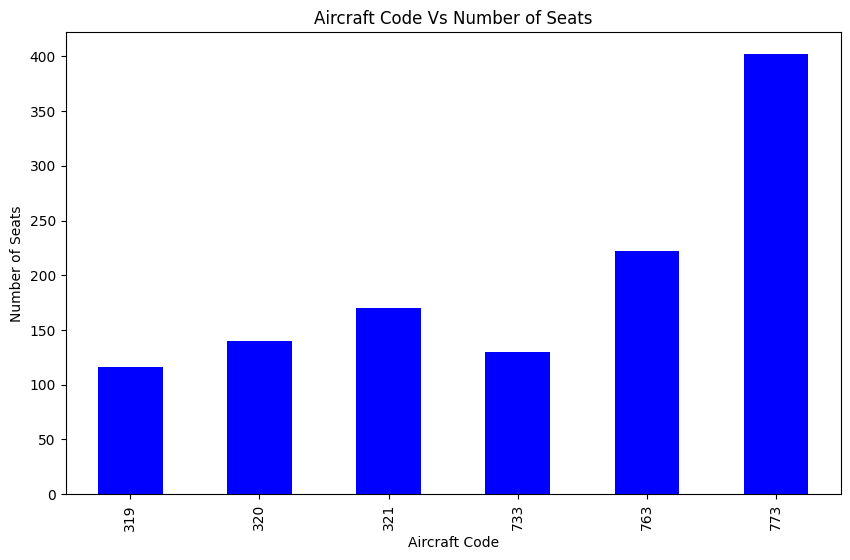

In [ ]:
grouped_data = X.groupby('aircraft_code')['Number_Of_Seats'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='blue')

# Set plot title and labels
plt.title('Aircraft Code Vs Number of Seats')
plt.xlabel('Aircraft Code')
plt.ylabel('Number of Seats')

**How the number of tickets booked and total amount earned changed with the time.**

In [ ]:
tickets=pd.read_sql_query(f""" select
                                    *
                                from
                                    tickets t
                                inner join
                                    bookings b
                                on
                                    t.book_ref = b.book_ref""",connection)

In [ ]:
tickets['book_date'] = pd.to_datetime(tickets['book_date'])

In [ ]:
tickets['date'] = tickets['book_date'].dt.date

In [ ]:
x=tickets.groupby('date')[["date"]].count()

In Order To Gain A Deeper Understanding Of The Trend Of Ticket Bookings and
Revenue Earned Through Those Bookings, We Have Utilized A Line Chart
Visualization.

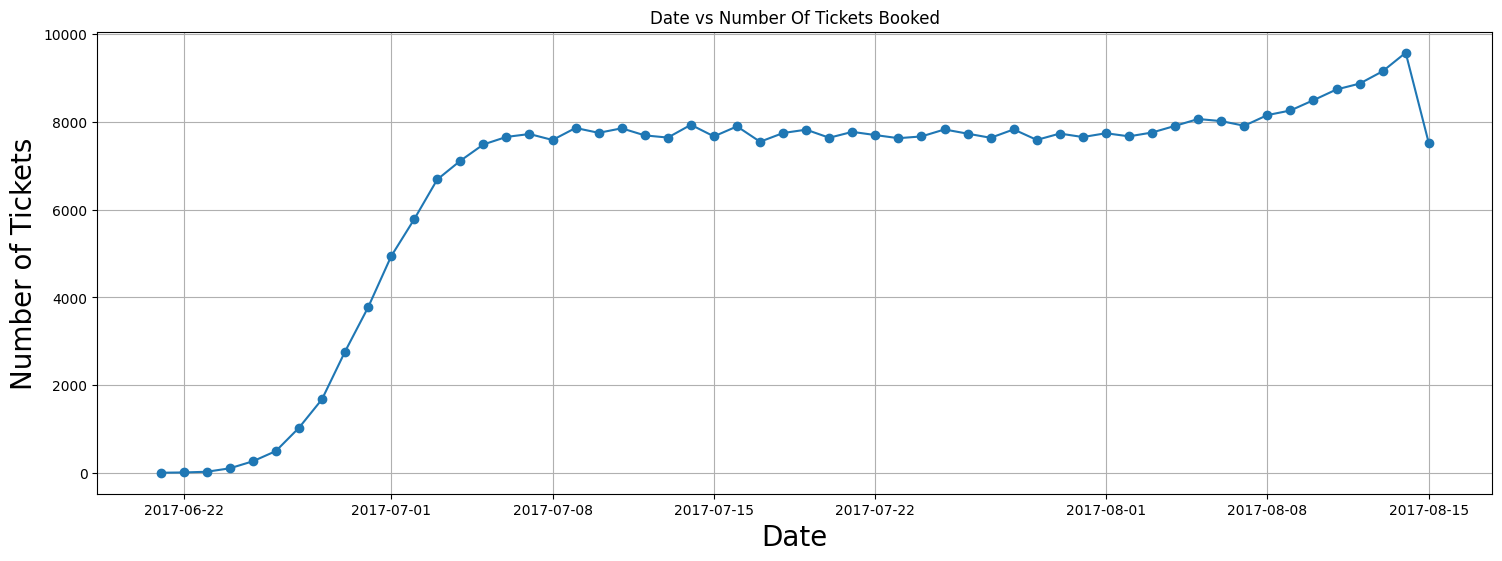

In [ ]:
plt.figure(figsize = (18,6))
plt.plot(x.index,x['date'], marker = 'o')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Number of Tickets', fontsize = 20)
plt.title('Date vs Number Of Tickets Booked')
plt.grid('b')
plt.show()

we observe that the number of
tickets booked exhibits a gradual increase from June 22nd to July 7th,
followed by a relatively stable pattern from July 8th until August

In [ ]:
y=tickets.groupby('date')[["total_amount"]].sum()

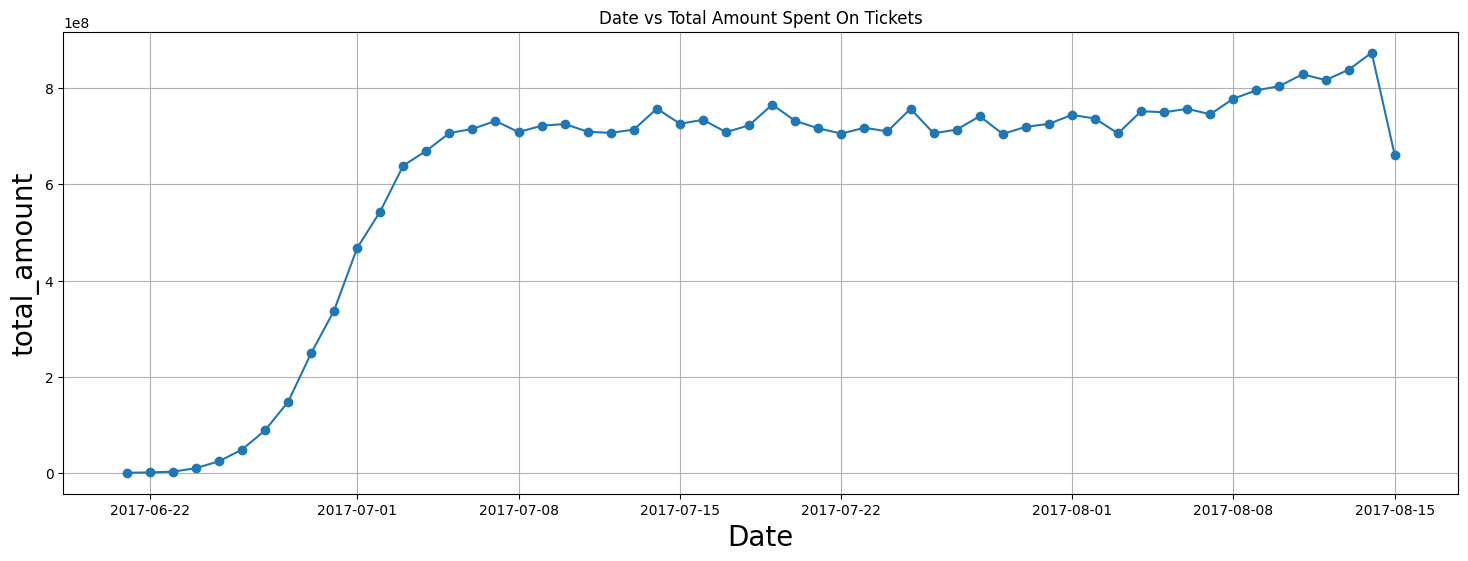

In [ ]:
plt.figure(figsize = (18,6))
plt.plot(y.index,y['total_amount'], marker = 'o')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('total_amount', fontsize = 20)
plt.title("Date vs Total Amount Spent On Tickets")
plt.grid('b')
plt.show()

**We Have The Similar Treand Like Ticket's booked For Revenue Earned Also**

**Calculate The Average Charges For Each Aircraft Code With Different Fare Conditions**

In [ ]:
data=pd.read_sql_query(f"""select
                                aircraft_code,fare_conditions,Avg(amount) as Avg_Amount
                            from
                                ticket_flights tf
                            inner join
                                flights f
                            on
                                tf.flight_id = f.flight_id
                            group by
                                aircraft_code,fare_conditions""",connection)

<Axes: xlabel='aircraft_code', ylabel='Avg_Amount'>

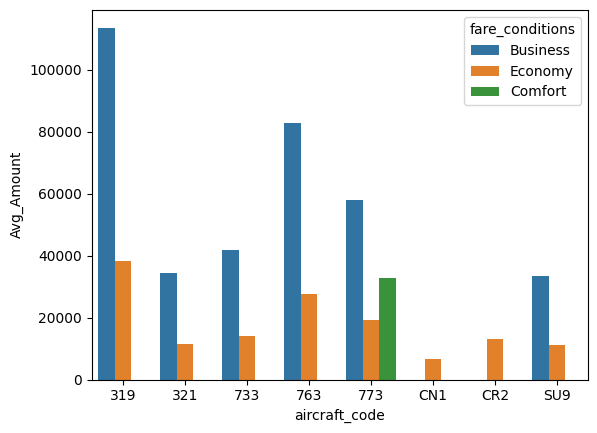

In [ ]:
sns.barplot(data = data, x = 'aircraft_code', y ='Avg_Amount', hue = 'fare_conditions')

Only Aircraft Code 773 has comfort class is available.
The CN1 and CR2 planes, on the other hand, only provide the economy
class. When different pricing circumstances within each aircraft are
compared, the charges for business class are consistently greater thanthose for economy class. This trend may be seen across all planes,
regardless of fare conditions.


In [ ]:
df=pd.read_sql_query(f"""select * ,Total_Revenue/ticket_count as Avg_Revenue_Per_Ticket
                      from
                      (select
                            aircraft_code , sum(amount) as Total_Revenue,COUNT(*) as ticket_count
                      from
                            ticket_flights as tf
                      inner join
                            flights f
                      on
                            tf.flight_id = f.flight_id
                      group by
                            aircraft_code)
                      order by
                            Avg_Revenue_Per_Ticket desc """,connection)
df

,aircraft_code,Total_Revenue,ticket_count,Avg_Revenue_Per_Ticket
0,319,2706163100,52853,51201
1,763,4371277100,124774,35033
2,773,3431205500,144376,23765
3,733,1426552100,86102,16568
4,321,1638164100,107129,15291
5,SU9,5114484700,365698,13985
6,CR2,1982760500,150122,13207
7,CN1,96373800,14672,6568


In [ ]:
df.set_index('aircraft_code', inplace=True)

Text(0.5, 1.0, 'Aircraft_Code vs Total_Revenue')

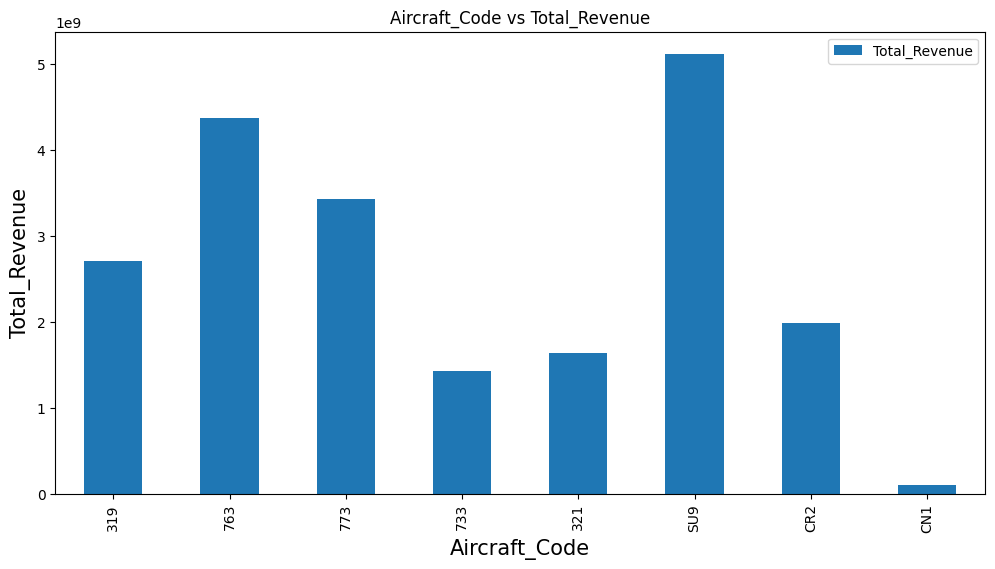

In [ ]:
df[['Total_Revenue']].plot(kind='bar', figsize=(12, 6))
plt.xlabel('Aircraft_Code', fontsize = 15)
plt.ylabel('Total_Revenue', fontsize = 15)
plt.title("Aircraft_Code vs Total_Revenue")

The aircraft with the highest total revenue is SU9
 It can be seen that the price of the business class and economy
 class is the lowest in this aircraft SU9. This can be the reason that most of the
people bought this aircraft ticket as its cost is less compared to others

aircraft with least total revenue is CN1, and the possible reason behind this
is it only offers economy class with very least price and it might be because
of its poor conditions or less facilities.

Text(0.5, 1.0, "Aircraft_Code vs Ticket's_Count")

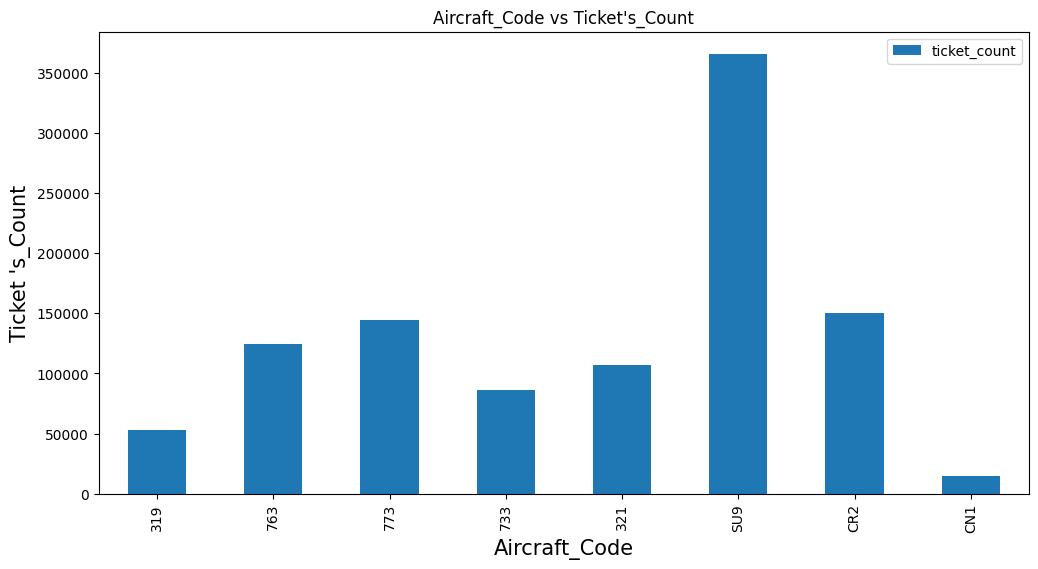

In [ ]:
df[['ticket_count']].plot(kind='bar', figsize=(12, 6))
plt.xlabel('Aircraft_Code', fontsize = 15)
plt.ylabel("Ticket 's_Count", fontsize = 15)
plt.title("Aircraft_Code vs Ticket's_Count")

Text(0.5, 1.0, 'Aircraft_Code vs Avg_Revenue_Per_Ticket')

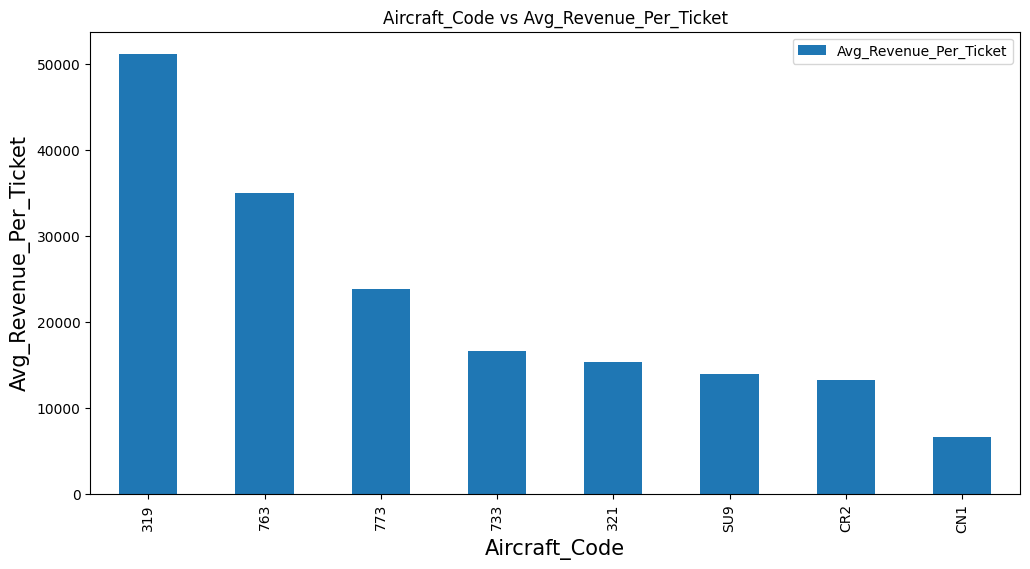

In [ ]:
df[['Avg_Revenue_Per_Ticket']].plot(kind='bar', figsize=(12, 6))
plt.xlabel('Aircraft_Code', fontsize = 15)
plt.ylabel("Avg_Revenue_Per_Ticket", fontsize = 15)
plt.title("Aircraft_Code vs Avg_Revenue_Per_Ticket")

**Analyzing Occupancy Rate**

Number Of Seat's in Each Aircraft

In [ ]:
Seats=pd.read_sql_query(f"""select aircraft_code,count(distinct seat_no) as seats
                      from
                      seats
                      group by
                      aircraft_code""",connection)
Seats


,aircraft_code,seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402
6,CN1,12
7,CR2,50
8,SU9,97


Occupancy Rate

In [ ]:
occupancy_rate = pd.read_sql_query(f"""SELECT a.aircraft_code, AVG(a.seats_count) as Avg_booked_seats, b.num_seats,
AVG(a.seats_count)/b.num_seats as occupancy_rate
                            FROM (
                                SELECT aircraft_code, flights.flight_id, COUNT(*) as seats_count
                                FROM boarding_passes
                                INNER JOIN flights
                                ON boarding_passes.flight_id=flights.flight_id
                                GROUP BY aircraft_code, flights.flight_id
                                ) as a INNER JOIN
                                (
                                SELECT aircraft_code, COUNT(*) as num_seats FROM seats
                                GROUP BY aircraft_code
                                ) as b
                                ON a.aircraft_code = b.aircraft_code
                            GROUP BY a.aircraft_code
                            order by occupancy_rate desc""", connection)
occupancy_rate


,aircraft_code,Avg_booked_seats,num_seats,occupancy_rate
0,773,264.925806,402,0.659019
1,733,80.255462,130,0.617350
2,SU9,56.812113,97,0.585692
3,321,88.809231,170,0.522407
4,763,113.937294,222,0.513231
5,CN1,6.004431,12,0.500369
6,319,53.583181,116,0.461924
7,CR2,21.482847,50,0.429657


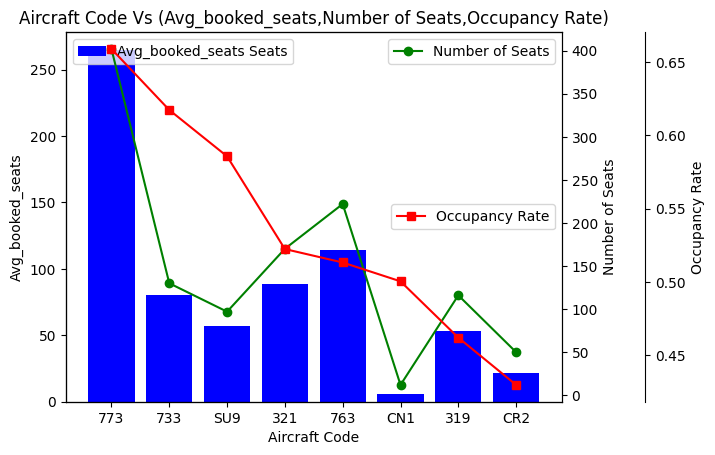

In [ ]:
fig, ax1 = plt.subplots()
ax1.bar(occupancy_rate['aircraft_code'], occupancy_rate['Avg_booked_seats'], color='b', label='Avg_booked_seats Seats')
ax1.set_xlabel('Aircraft Code')
ax1.set_ylabel('Avg_booked_seats')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()


ax2.plot(occupancy_rate['aircraft_code'], occupancy_rate['num_seats'], color='g', marker='o', label='Number of Seats')
ax2.set_ylabel('Number of Seats')
ax2.legend(loc='upper right')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))

ax3.plot(occupancy_rate['aircraft_code'], occupancy_rate['occupancy_rate'], color='r', marker='s', label='Occupancy Rate')
ax3.set_ylabel('Occupancy Rate')
ax3.legend(loc='center right')
plt.title("Aircraft Code Vs (Avg_booked_seats,Number of Seats,Occupancy Rate)")
plt.show()

The average occupancy per aircraft is another critical number to consider.
Airlines may measure how successfully they fill their seats and discover
chances to boost occupancy rates by using this metric. Higher occupancy
rates can help airlines increase revenue and profitability while lowering
operational expenses associated with vacant seats. Pricing strategy, airline
schedules, and customer satisfaction are all factors that might influence
occupancy rates the average booked seats from
the total number of seats for each aircraft. The occupancy rate is calculated
by dividing the booked seats by the total number of seats. Higher occupancy rate means the aircraft seats are more booked and only few
seats are left unbooked.


In [ ]:
occupancy_rate['Inc occupancy rate'] = occupancy_rate['occupancy_rate'] + occupancy_rate['occupancy_rate']*0.1
occupancy_rate

,aircraft_code,Avg_booked_seats,num_seats,occupancy_rate,Inc occupancy rate
0,773,264.925806,402,0.659019,0.724921
1,733,80.255462,130,0.617350,0.679085
2,SU9,56.812113,97,0.585692,0.644261
3,321,88.809231,170,0.522407,0.574648
4,763,113.937294,222,0.513231,0.564554
5,CN1,6.004431,12,0.500369,0.550406
6,319,53.583181,116,0.461924,0.508116
7,CR2,21.482847,50,0.429657,0.472623


In [ ]:
merged_df = pd.merge(occupancy_rate, df, on='aircraft_code', how='inner')
merged_df

,aircraft_code,Avg_booked_seats,num_seats,occupancy_rate,Inc occupancy rate,Total_Revenue,ticket_count,Avg_Revenue_Per_Ticket
0,773,264.925806,402,0.659019,0.724921,3431205500,144376,23765
1,733,80.255462,130,0.617350,0.679085,1426552100,86102,16568
2,SU9,56.812113,97,0.585692,0.644261,5114484700,365698,13985
3,321,88.809231,170,0.522407,0.574648,1638164100,107129,15291
4,763,113.937294,222,0.513231,0.564554,4371277100,124774,35033
5,CN1,6.004431,12,0.500369,0.550406,96373800,14672,6568
6,319,53.583181,116,0.461924,0.508116,2706163100,52853,51201
7,CR2,21.482847,50,0.429657,0.472623,1982760500,150122,13207


In [ ]:
merged_df['Inc Total Annual Turnover_with 10%'] = (merged_df['Total_Revenue']/merged_df['occupancy_rate'])*merged_df['Inc occupancy rate']
merged_df

,aircraft_code,Avg_booked_seats,num_seats,occupancy_rate,Inc occupancy rate,Total_Revenue,ticket_count,Avg_Revenue_Per_Ticket,Inc Total Annual Turnover_with
0,773,264.925806,402,0.659019,0.724921,3431205500,144376,23765,3.774326e+09
1,733,80.255462,130,0.617350,0.679085,1426552100,86102,16568,1.569207e+09
2,SU9,56.812113,97,0.585692,0.644261,5114484700,365698,13985,5.625933e+09
3,321,88.809231,170,0.522407,0.574648,1638164100,107129,15291,1.801981e+09
4,763,113.937294,222,0.513231,0.564554,4371277100,124774,35033,4.808405e+09
5,CN1,6.004431,12,0.500369,0.550406,96373800,14672,6568,1.060112e+08
6,319,53.583181,116,0.461924,0.508116,2706163100,52853,51201,2.976779e+09
7,CR2,21.482847,50,0.429657,0.472623,1982760500,150122,13207,2.181037e+09


**Conclusion**

To summarize, analyzing revenue data such as total revenue per year,
average revenue per ticket, and average occupancy per aircraft is critical
for airlines seeking to maximize profitability. Airlines can find areas for
improvement and modify their pricing and route plans as a result of
assessing these indicators. A greater occupancy rate is one important
feature that can enhance profitability since it allows airlines to maximize
revenue while minimizing costs associated with vacant seats. The airline
should revise the price for each aircraft as the lower price and high price is
also the factor that people are not buying tickets from those aircrafts. They
should decide the reasonable price according to the condition and facility of
the aircraft and it should not be very cheap or high.Furthermore, boosting occupancy rates should not come at the price of
consumer happiness or safety. Airlines must strike a balance between the
necessity for profit and the significance of delivering high-quality service
and upholding safety regulations. Airlines may achieve long-term success
in a highly competitive business by adopting a data-driven strategy to
revenue analysis and optimisation.